In [1]:
#importing the libraries
import os
import glob
import path

#all the libraries for models
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [2]:
#logger
import logging as lg
lg.basicConfig(filename="load_data.log", level=lg.DEBUG, format="%(asctime)s, %(lineno)s, %(message)s")

In [3]:
#the dataset folder
try:
    lg.info("dataset folder")
    path = os.getcwd()
    print(path)
except Exception as e:
    lg.error(e)

C:\Users\sid\Downloads\AReM


In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 82A0-46B9

 Directory of C:\Users\sid\Downloads\AReM

16-09-2021  17:06    <DIR>          .
16-09-2021  17:06    <DIR>          ..
14-09-2021  22:13    <DIR>          .ipynb_checkpoints
13-09-2021  10:25    <DIR>          bending1
16-09-2021  12:44    <DIR>          bending2
18-05-2016  22:19            21,207 bendingType.pdf
18-05-2016  22:44    <DIR>          cycling
15-09-2021  12:27         4,005,910 final.ipynb
16-09-2021  17:06            31,408 final1.ipynb
16-09-2021  17:06         1,258,611 load_data.log
18-05-2016  22:50    <DIR>          lying
15-09-2021  16:45           115,054 opening.ipynb
18-05-2016  23:05           105,307 sensorsPlacement.pdf
18-05-2016  22:52    <DIR>          sitting
18-05-2016  22:53    <DIR>          standing
18-05-2016  22:55    <DIR>          walking
               6 File(s)      5,537,497 bytes
              10 Dir(s)  10,951,143,424 bytes free


In [5]:
try:
    lg.info("combining bending1 dataset into one ")
    path = r'C:/Users/sid/Downloads/AReM/bending1'
    all_csv = glob.glob(path + "/*.csv")
    lis = []
    for csv in all_csv:
        df = pd.read_csv(csv, header=None, sep=',', skiprows=5, error_bad_lines=False)
        lis.append(df)
    bending1 = pd.concat(lis, axis=0, ignore_index=True)
except Exception as e:
    lg.error(e)

In [6]:
lg.info("dataset shape")
bending1.shape

(3360, 7)

In [7]:
lg.info("info of dataset")
bending1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3360 non-null   int64  
 1   1       3360 non-null   float64
 2   2       3360 non-null   float64
 3   3       3360 non-null   float64
 4   4       3360 non-null   float64
 5   5       3360 non-null   float64
 6   6       3360 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 183.9 KB


In [8]:
lg.info("dataset description")
bending1.describe()

0            1            2            3            4  \
count    3360.000000  3360.000000  3360.000000  3360.000000  3360.000000   
mean    59875.000000    42.667723     0.454360    19.158830     0.793399   
std     34646.097028     2.361918     0.400185     4.553348     0.915341   
min         0.000000    33.000000     0.000000     1.500000     0.000000   
25%     29937.500000    41.750000     0.000000    16.000000     0.000000   
50%     59875.000000    42.750000     0.470000    19.500000     0.500000   
75%     89812.500000    44.500000     0.500000    23.000000     1.120000   
max    119750.000000    48.000000     3.000000    30.000000    10.030000   

                 5           6  
count  3360.000000  3360.00000  
mean     30.201982     0.55239  
std       5.761234     0.54323  
min       8.000000     0.00000  
25%      24.250000     0.00000  
50%      31.500000     0.47000  
75%      35.500000     0.87000  
max      38.670000     5.26000

In [9]:
bending1.dtypes

0      int64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [10]:
try:
    lg.info("adding the label in dataset")
    bending1['label'] = 'bending1'
except Exception as e:
    lg.error(e)

In [11]:
bending1.dtypes

0          int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
label     object
dtype: object

In [12]:
lg.info("changing the dataset folder")
try:
    os.chdir(r"C:\Users\sid\Downloads\AReM\bending2")
except Exception as e:
    lg.error(e)

In [13]:
try:
    lg.info("all the dataset files in bending2 folder")
    df1 = pd.read_csv('dataset1.csv', sep=',', header=None, skiprows=5)
    df2 = pd.read_csv('dataset2.csv', sep=',', header=None, skiprows=5)
    df3 = pd.read_csv('dataset3.csv', sep=',', header=None, skiprows=5)
    df4 = pd.read_csv('dataset4.csv', sep=' ', header=None, skiprows=5 ,
                 usecols =[0,1,2,3,4,5,6])
    df5 = pd.read_csv('dataset5.csv', header=None, skiprows=5)
    df6 = pd.read_csv('dataset6.csv', header=None, skiprows=5)
except Exception as e:
    lg.error(e)

In [14]:
data_frames = [df1, df2, df3, df4, df5, df6]
data_frames

[          0      1     2      3     4      5     6
 0         0  23.75  0.43  24.00  0.00  24.67  0.47
 1       250  22.67  0.94  24.00  0.00  24.67  0.94
 2       500  21.33  0.47  24.00  0.00  24.75  0.83
 3       750  21.00  0.00  24.00  0.00  25.25  1.09
 4      1000  23.00  0.71  23.75  0.43  24.75  0.83
 ..      ...    ...   ...    ...   ...    ...   ...
 475  118750  27.50  0.50  22.75  1.30  21.00  0.00
 476  119000  27.00  0.00  21.00  0.00  20.75  1.09
 477  119250  27.00  0.00  21.00  0.00  20.50  0.50
 478  119500  27.25  0.43  23.50  0.87  20.75  0.43
 479  119750  27.00  0.00  24.00  0.00  19.25  0.83
 
 [480 rows x 7 columns],
           0      1     2      3     4      5     6
 0         0  27.00  0.00  24.00  0.00  19.00  1.00
 1       250  27.00  0.00  24.00  0.00  19.75  0.83
 2       500  27.00  0.00  23.50  0.50  20.00  1.22
 3       750  27.00  0.00  24.00  0.00  14.75  1.48
 4      1000  27.00  0.00  23.75  0.43  14.50  1.50
 ..      ...    ...   ...    ...   ..

In [15]:
try:
    lg.info("combining the dataset of bending2")
    from functools import reduce
    df_bending2 = reduce(lambda left, right:pd.merge(left, right, how='outer'),
                    data_frames)
except Exception as e:
    lg.error(e)

In [16]:
try:
    lg.info("adding the label in bending2 dataset files")
    df_bending2['label'] = 'bending2'
except Exception as e:
    lg.error(e)

In [17]:
df_bending2.dtypes

0          int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
label     object
dtype: object

In [18]:
try:
    lg.info("the dataset where cycling datasetfiles are")
    path = r'C:\Users\sid\Downloads\AReM\cycling'
    all_csv = glob.glob(path + "/*.csv")
    lis = []
    
    for csv in all_csv:
        df = pd.read_csv(csv , sep=',' , header=None, skiprows=5,  error_bad_lines=False)
        lis.append(df)
    cycling = pd.concat(lis, axis=0 , ignore_index=True)
except Exception as e:
    lg.error(e)

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [19]:
cycling.shape

(7198, 7)

In [20]:
cycling.dtypes

0      int64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [21]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7198 entries, 0 to 7197
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7198 non-null   int64  
 1   1       7198 non-null   float64
 2   2       7198 non-null   float64
 3   3       7198 non-null   float64
 4   4       7198 non-null   float64
 5   5       7198 non-null   float64
 6   6       7198 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 393.8 KB


In [22]:
cycling.describe()

0            1            2            3            4  \
count    7198.000000  7198.000000  7198.000000  7198.000000  7198.000000   
mean    59858.363434    36.747305     2.688654    16.395645     2.989557   
std     34633.776409     3.821483     1.934684     3.605867     1.708674   
min         0.000000    18.500000     0.000000     0.000000     0.000000   
25%     29812.500000    34.250000     1.300000    14.000000     1.660000   
50%     59750.000000    36.250000     2.170000    16.330000     2.770000   
75%     89750.000000    40.000000     3.700000    18.750000     4.030000   
max    119750.000000    45.000000    14.170000    28.500000    10.610000   

                 5            6  
count  7198.000000  7198.000000  
mean     17.397501     3.037647  
std       3.302723     1.765061  
min       0.000000     0.000000  
25%      15.250000     1.700000  
50%      17.500000     2.740000  
75%      19.750000     4.030000  
max      27.000000    11.150000

In [23]:
cycling.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [24]:
try:
    lg.info("adding the label")
    cycling['label'] = 'cycling'
except Exception as e:
    lg.error(e)

In [25]:
cycling.head()

0     1     2      3     4      5     6    label
0     0  32.0  4.85  17.50  3.35  22.50  3.20  cycling
1   250  40.5  1.12  14.00  2.24  21.75  1.30  cycling
2   500  40.5  2.60  11.33  4.50  18.25  5.31  cycling
3   750  34.5  1.50  20.67  2.87  19.00  2.83  cycling
4  1000  34.5  1.50  21.25  3.27  18.25  4.38  cycling

In [26]:
try:
    lg.info("changing the directory lying folder")
    import glob
    path = r'C:\Users\sid\Downloads\AReM\lying'
    all_csv = glob.glob(path + "/*.csv")
    
    lis = []
    for csv in all_csv:
        df = pd.read_csv(csv , sep=',' , header=None, skiprows=5,  error_bad_lines=False)
        lis.append(df)
    
    lying = pd.concat(lis, axis=0 , ignore_index=True)
except Exception as e:
    lg.error(e)

In [27]:
try:
    lg.info("adding the label for activity lying")
    lying['label'] = 'lying'
except Exception as e:
    lg.error(e)

In [28]:
lying.shape

(7200, 8)

In [29]:
lying.head()

0     1    2     3     4     5     6  label
0     0  29.0  0.0  9.00  0.71  8.50  0.50  lying
1   250  29.0  0.0  8.00  0.71  8.50  0.50  lying
2   500  29.0  0.0  8.00  0.71  8.00  1.00  lying
3   750  28.5  0.5  8.25  0.43  8.75  0.43  lying
4  1000  29.0  0.0  8.75  1.09  9.00  0.00  lying

In [30]:
lying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7200 non-null   int64  
 1   1       7200 non-null   float64
 2   2       7200 non-null   float64
 3   3       7200 non-null   float64
 4   4       7200 non-null   float64
 5   5       7200 non-null   float64
 6   6       7200 non-null   float64
 7   label   7200 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 450.1+ KB


In [31]:
lying.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
label    0
dtype: int64

In [32]:
try:
    lg.info("combining all files in the sitting folder")
    path = r'C:\Users\sid\Downloads\AReM\sitting'
    all_csv = glob.glob(path + "/*.csv")
    
    lis = []
    
    for i in all_csv:
        df = pd.read_csv(csv , sep=',' , header=None, skiprows=5,  error_bad_lines=False)
        lis.append(df)
    sitting = pd.concat(lis, axis=0, ignore_index=True)
except Exception as e:
    lg.error(e)

In [33]:
try:
    lg.info("adding the label for activity sitting")
    sitting['label'] = 'sitting'
except Exception as e:
    lg.error(e)

In [34]:
sitting.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
label    0
dtype: int64

In [35]:
sitting.dtypes

0          int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
label     object
dtype: object

In [37]:
try:
    lg.info("changing the folder to standing and combining the datasets")
    path = r'C:/Users/sid/Downloads/AReM/standing'
    all_csv = glob.glob(path + "/*.csv")
    
    lis = []
    
    for i in all_csv:
        df = pd.read_csv(csv , sep=',' , header=None, skiprows=5,  error_bad_lines=False)
        lis.append(df)
    
    standing = pd.concat(lis, axis=0, ignore_index=True)

except Exception as e:
    lg.error(e)

In [38]:
standing.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [39]:
try:
    lg.info("adding the label for activity sitting")
    standing['label'] = 'standing'
except Exception as e:
    lg.error(e)

In [40]:
standing.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
label    0
dtype: int64

In [41]:
try:
    lg.info("changing the folder and combining the datasets")
    path = r'C:/Users/sid/Downloads/AReM/walking'
    all_csv = glob.glob(path + "/*.csv")
    
    lis = []
    
    for i in all_csv:
        df = pd.read_csv(csv , sep=',' , header=None, skiprows=5,  error_bad_lines=False)
        lis.append(df)
    
    walking = pd.concat(lis, axis=0, ignore_index=True)

except Exception as e:
    lg.error(e)    

In [42]:
walking.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [43]:
try:
    lg.info("adding the label for walking")
    walking['label'] = 'walking'
except Exception as e:
    lg.error(e)

In [44]:
walking

0      1     2      3     4      5     6    label
0          0  39.67  0.47   6.00  0.82  16.00  1.00  walking
1        250  39.50  0.50   4.50  1.12  17.75  0.43  walking
2        500  39.67  0.47   4.50  1.12  18.33  0.47  walking
3        750  39.50  0.50   4.50  2.06  17.50  0.50  walking
4       1000  39.33  0.47   5.33  0.47  17.00  0.71  walking
...      ...    ...   ...    ...   ...    ...   ...      ...
7195  118750  41.50  0.50  10.67  0.47  14.00  0.82  walking
7196  119000  41.50  0.50  10.80  0.40  14.40  0.80  walking
7197  119250  41.75  0.43  10.00  0.00  13.67  0.94  walking
7198  119500  42.00  0.00   9.40  0.49  14.00  1.10  walking
7199  119750  41.75  0.43   9.00  0.00  14.33  0.47  walking

[7200 rows x 8 columns]

In [45]:
try:
    lg.info("combining all the dataset into one")
    final_df = pd.concat([bending1, df_bending2, cycling, lying, sitting , standing, walking])
except Exception as e:
    lg.error(e)

In [46]:
try:
    lg.info("adding the columns")
    final_df.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'label']
except Exception as e:
    lg.error(e)

In [47]:
final_df.isnull().sum()

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
label        0
dtype: int64

In [48]:
final_df.dtypes

time           int64
avg_rss12    float64
var_rss12    float64
avg_rss13    float64
var_rss13    float64
avg_rss23    float64
var_rss23    float64
label         object
dtype: object

In [49]:
ProfileReport(final_df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='time', ylabel='Density'>

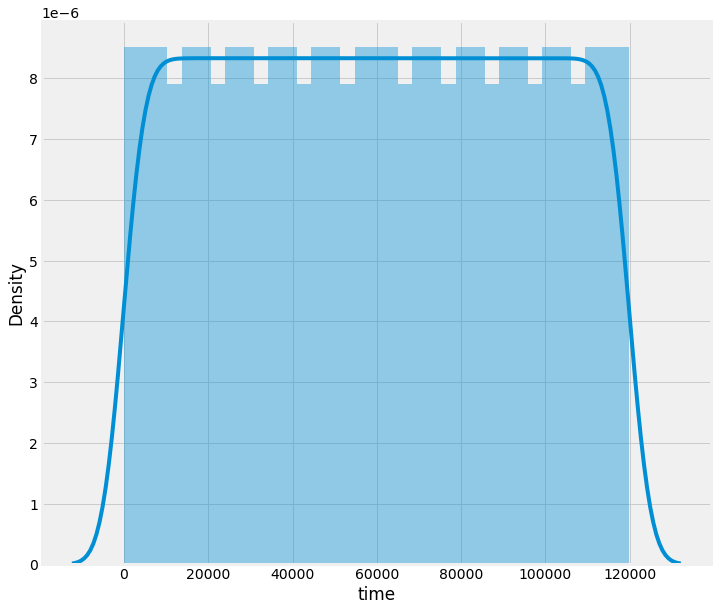

In [50]:
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['time'])

<AxesSubplot:xlabel='avg_rss12', ylabel='Density'>

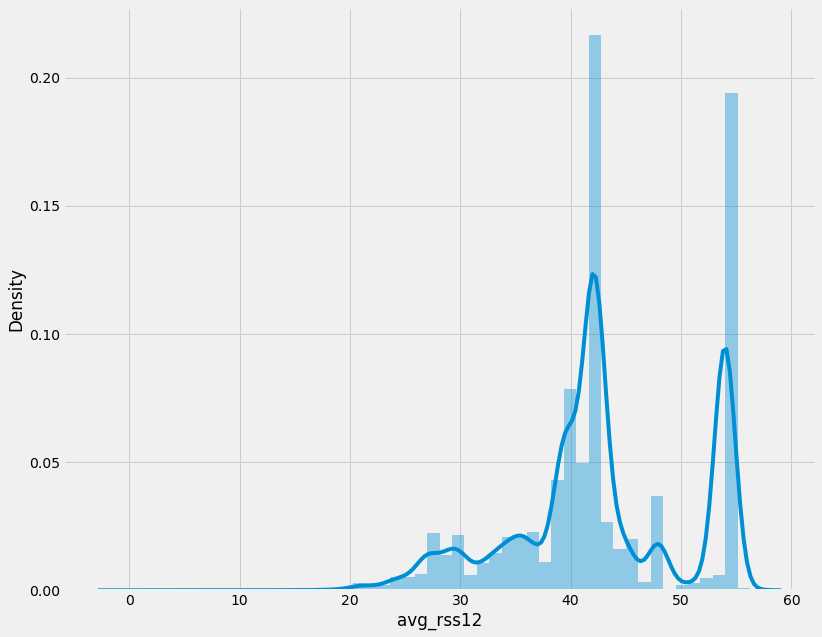

In [51]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['avg_rss12'])

<AxesSubplot:xlabel='var_rss12', ylabel='Density'>

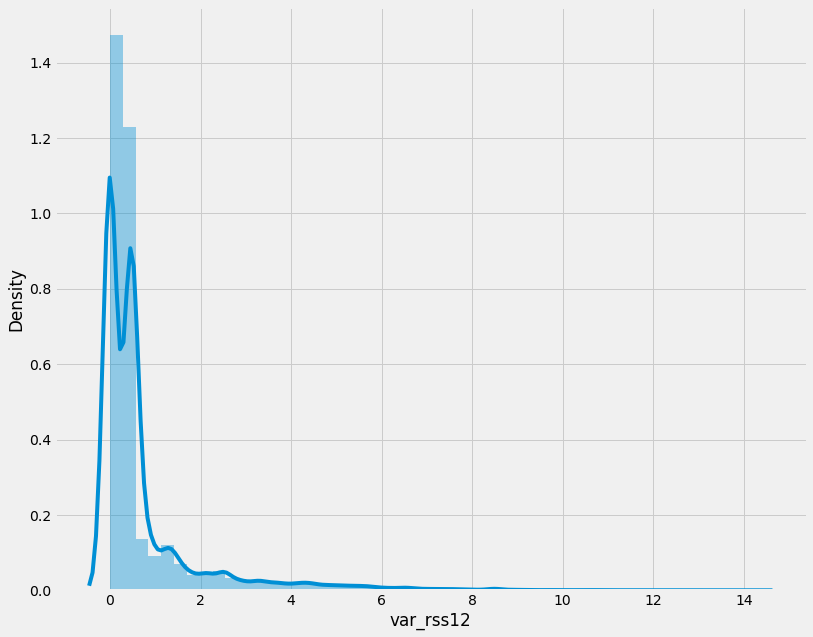

In [52]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['var_rss12'])

<AxesSubplot:xlabel='avg_rss13', ylabel='Density'>

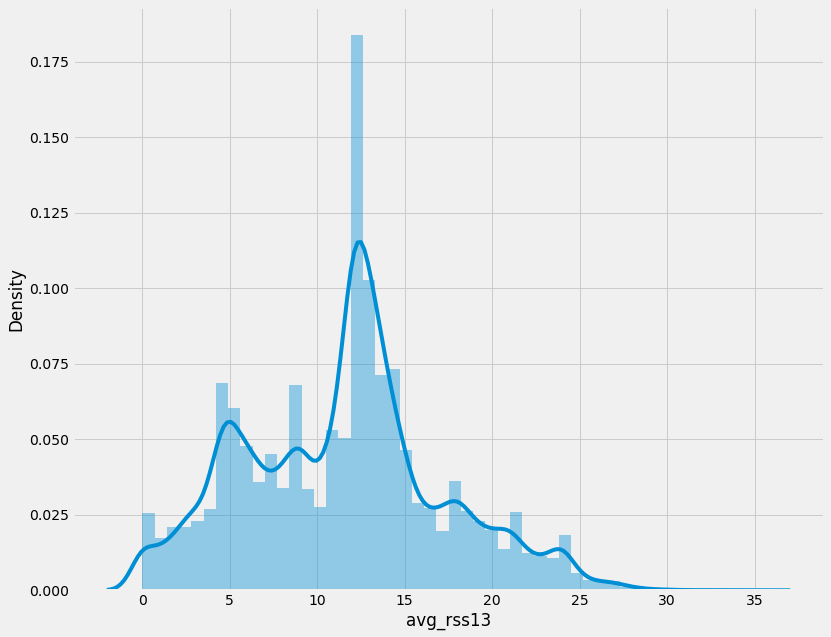

In [53]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['avg_rss13'])

<AxesSubplot:xlabel='var_rss13', ylabel='Density'>

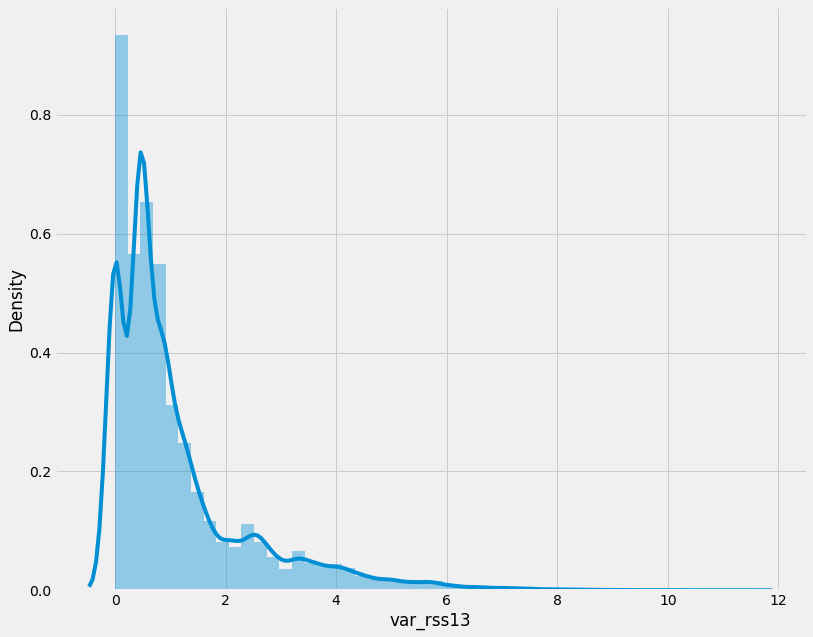

In [54]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['var_rss13'])

<AxesSubplot:xlabel='avg_rss23', ylabel='Density'>

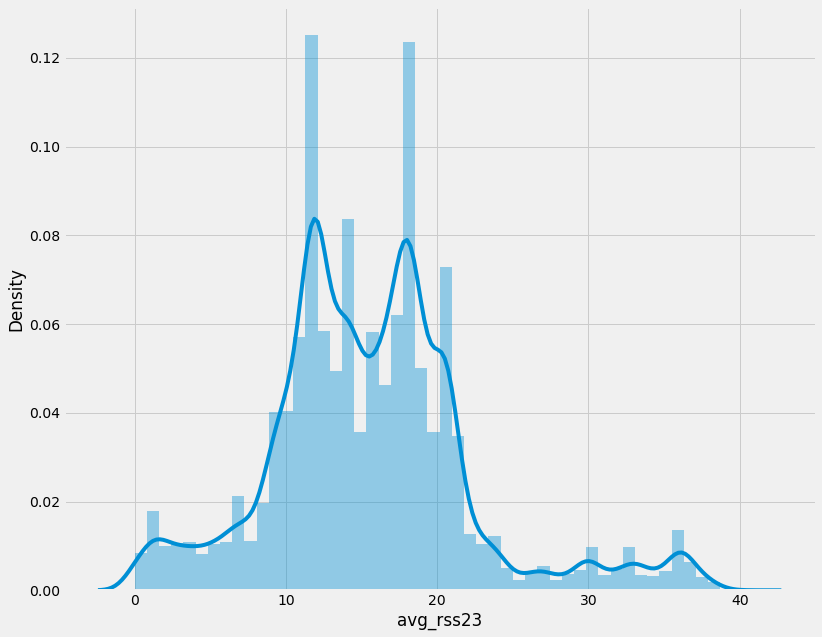

In [55]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['avg_rss23'])

<AxesSubplot:xlabel='var_rss23', ylabel='Density'>

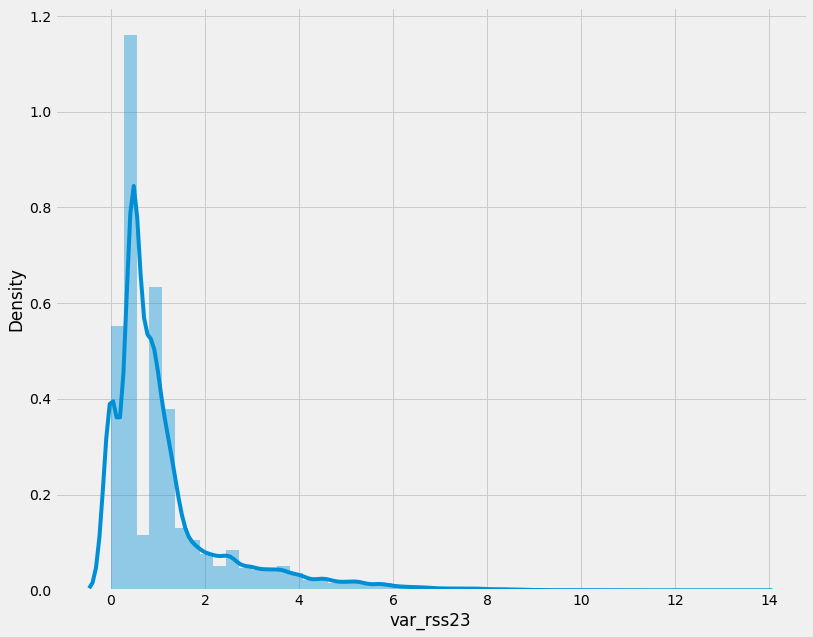

In [56]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.distplot(final_df['var_rss23'])

In [57]:
final_df.columns

Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'label'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

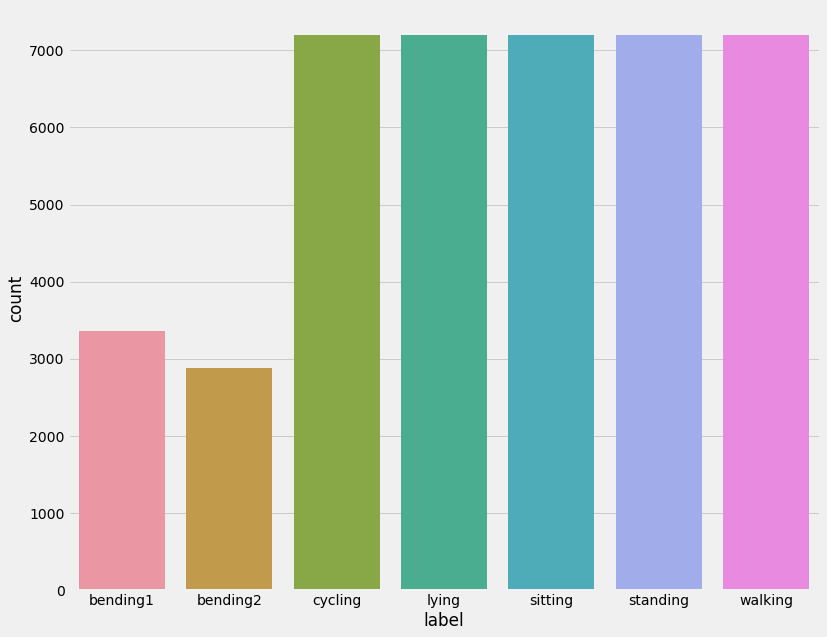

In [58]:
plt.figure(figsize=(12, 10))
sns.countplot(final_df['label'])

In [59]:
final_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0          0      39.25       0.43      22.75       0.43      33.75   
1        250      39.25       0.43      23.00       0.00      33.00   
2        500      39.25       0.43      23.25       0.43      33.00   
3        750      39.50       0.50      23.00       0.71      33.00   
4       1000      39.50       0.50      24.00       0.00      33.00   
...      ...        ...        ...        ...        ...        ...   
7195  118750      41.50       0.50      10.67       0.47      14.00   
7196  119000      41.50       0.50      10.80       0.40      14.40   
7197  119250      41.75       0.43      10.00       0.00      13.67   
7198  119500      42.00       0.00       9.40       0.49      14.00   
7199  119750      41.75       0.43       9.00       0.00      14.33   

      var_rss23     label  
0          1.30  bending1  
1          0.00  bending1  
2          0.00  bending1  
3          0.00  bending1  
4          0.00  bending1  
...         ...       ...  
7195       0.82   walking  
7196       0.80   walking  
7197       0.94   walking  
7198       1.10   walking  
7199       0.47   walking  

[42238 rows x 8 columns]

In [60]:
y = final_df['label']

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [62]:
target = le.fit_transform(y)

In [63]:
target.shape

(42238,)

In [64]:
x = final_df.drop('label', axis=1)

In [65]:
try:
    lg.info("standardize the data")
    scalar = StandardScaler()
    ProfileReport(pd.DataFrame(scalar.fit_transform(x)))
    x_scaled = scalar.fit_transform(x)
except Exception as e:
    lg.error(e)

In [66]:
x_scaled

array([[-1.72844562, -0.4276623 , -0.22750026, ..., -0.52477425,
         2.68657524,  0.12827614],
       [-1.72122838, -0.4276623 , -0.22750026, ..., -0.84949444,
         2.57595644, -0.87013852],
       [-1.71401115, -0.4276623 , -0.22750026, ..., -0.52477425,
         2.57595644, -0.87013852],
       ...,
       [ 1.71417484, -0.11381752, -0.22750026, ..., -0.84949444,
        -0.2750589 , -0.14820792],
       [ 1.72139208, -0.08243304, -0.5606259 , ..., -0.47946446,
        -0.22638662, -0.02532612],
       [ 1.72860931, -0.11381752, -0.22750026, ..., -0.84949444,
        -0.17771435, -0.50917322]])

In [67]:
def vif_score(x):
    try: 
        lg.info("vif score ")
        scaler = StandardScaler()
        arr = scaler.fit_transform(x)
        return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])
    except Exception as e:
        lg.error(e)

In [68]:
vif_score(x)

FEATURE  VIF_SCORE
0       time   1.110289
1  avg_rss12   1.248030
2  var_rss12   1.768504
3  avg_rss13   1.995340
4  var_rss13   1.578514
5  avg_rss23   1.752785
6  var_rss23   1.651067

# splitting the dataset

In [69]:
try:
    lg.info("splitting the training and testing")
    x_train, x_test, y_train, y_test = train_test_split(x_scaled , target , test_size = .20 , random_state = 144)
except Exception as e:
    lg.error(e)

In [70]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [71]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [72]:
y_pred = logr_liblinear.predict(x_test)

In [73]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logr_liblinear.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logr_liblinear.score(x_test, y_test)))

Training set score: 0.5363
Test set score: 0.5320


In [74]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 582    1   21    2   16    3   16]
 [  40  426   58   42    5    1    2]
 [   8   25 1354    6   19    3    4]
 [   0   36   11 1239  172   19   59]
 [   0    0   60  438  366  130  392]
 [   0    0   42  463  413  124  418]
 [   0    0   60  457  398  114  403]]

True Positives(TP) =  582

True Negatives(TN) =  426

False Positives(FP) =  1

False Negatives(FN) =  40


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       641
           1       0.87      0.74      0.80       574
           2       0.84      0.95      0.90      1419
           3       0.47      0.81      0.59      1536
           4       0.26      0.26      0.26      1386
           5       0.31      0.08      0.13      1460
           6       0.31      0.28      0.30      1432

    accuracy                           0.53      8448
   macro avg       0.57      0.58      0.56      8448
weighted avg       0.51      0.53      0.50      8448



<AxesSubplot:>

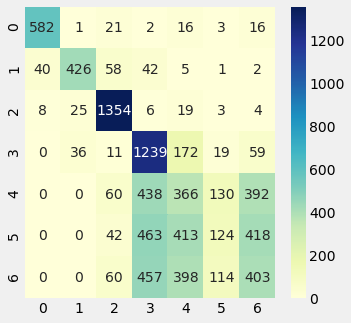

In [75]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm)
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [89]:
log_newton = LogisticRegression(verbose=1, solver='newton-cg')

In [90]:
log_newton.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(solver='newton-cg', verbose=1)

In [91]:
y_pred = log_newton.predict(x_test)

In [92]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.5397


In [93]:

#print the scores on training and test set

print('Training set score: {:.4f}'.format(log_newton.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(log_newton.score(x_test, y_test)))

Training set score: 0.5447
Test set score: 0.5397


In [94]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 598    6   33    0    2    0    2]
 [  40  455   49   28    0    2    0]
 [  10   36 1354    4    3   11    1]
 [   0   45    5 1205  188   34   59]
 [   0    0   13  414  387  183  389]
 [   0    0   14  432  436  158  420]
 [   0    0   20  433  415  162  402]]

True Positives(TP) =  598

True Negatives(TN) =  455

False Positives(FP) =  6

False Negatives(FN) =  40


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       641
           1       0.84      0.79      0.82       574
           2       0.91      0.95      0.93      1419
           3       0.48      0.78      0.59      1536
           4       0.27      0.28      0.27      1386
           5       0.29      0.11      0.16      1460
           6       0.32      0.28      0.30      1432

    accuracy                           0.54      8448
   macro avg       0.57      0.59      0.57      8448
weighted avg       0.51      0.54      0.51      8448



<AxesSubplot:>

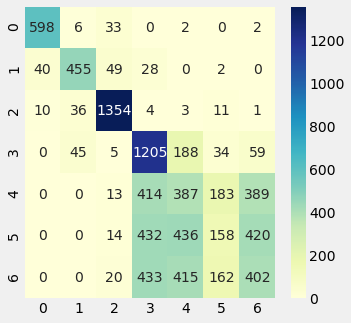

In [95]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm)
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [96]:
logr_sag = LogisticRegression(verbose=1, solver='sag')

In [97]:
logr_sag.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 19 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(solver='sag', verbose=1)

In [98]:
y_pred = logr_sag.predict(x_test)
y_pred

array([2, 4, 6, ..., 3, 4, 2])

In [99]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logr_sag.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logr_sag.score(x_test, y_test)))

Training set score: 0.5447
Test set score: 0.5397


In [113]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 598    6   33    0    2    0    2]
 [  40  455   49   28    0    2    0]
 [  10   36 1354    4    3   11    1]
 [   0   45    5 1205  188   34   59]
 [   0    0   13  414  387  183  389]
 [   0    0   14  432  436  158  420]
 [   0    0   20  433  415  162  402]]

True Positives(TP) =  598

True Negatives(TN) =  455

False Positives(FP) =  6

False Negatives(FN) =  40


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       641
           1       0.84      0.79      0.82       574
           2       0.91      0.95      0.93      1419
           3       0.48      0.78      0.59      1536
           4       0.27      0.28      0.27      1386
           5       0.29      0.11      0.16      1460
           6       0.32      0.28      0.30      1432

    accuracy                           0.54      8448
   macro avg       0.57      0.59      0.57      8448
weighted avg       0.51      0.54      0.51      8448



<AxesSubplot:>

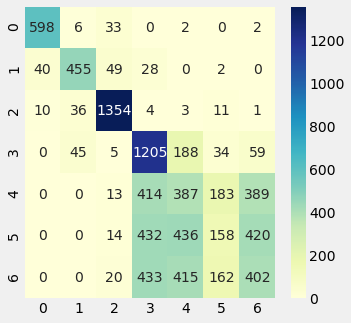

In [114]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm)
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [100]:
logr_saga = LogisticRegression(verbose=1, solver='saga')

In [101]:
logr_saga.fit(x_train , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 13 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(solver='saga', verbose=1)

In [102]:
y_pred = logr_saga.predict(x_test)

In [103]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logr_saga.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logr_saga.score(x_test, y_test)))

Training set score: 0.5449
Test set score: 0.5389


In [104]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 598    6   33    0    2    0    2]
 [  40  455   49   28    0    2    0]
 [  10   36 1354    4    3   11    1]
 [   0   45    5 1205  191   34   56]
 [   0    0   13  414  390  183  386]
 [   0    0   14  432  442  158  414]
 [   0    0   20  433  424  162  393]]

True Positives(TP) =  598

True Negatives(TN) =  455

False Positives(FP) =  6

False Negatives(FN) =  40


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       641
           1       0.84      0.79      0.82       574
           2       0.91      0.95      0.93      1419
           3       0.48      0.78      0.59      1536
           4       0.27      0.28      0.27      1386
           5       0.29      0.11      0.16      1460
           6       0.31      0.27      0.29      1432

    accuracy                           0.54      8448
   macro avg       0.57      0.59      0.57      8448
weighted avg       0.51      0.54      0.51      8448



<AxesSubplot:>

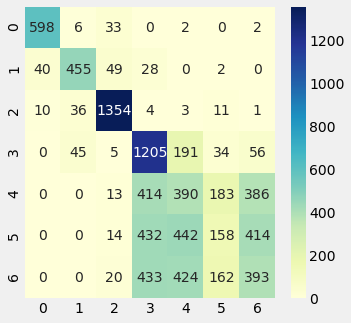

In [105]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm)
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [106]:
logr_lbfgs = LogisticRegression(verbose=1, solver='lbfgs')

In [107]:
logr_lbfgs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(verbose=1)

In [108]:
y_pred = logr_lbfgs.predict(x_test)

In [109]:
from sklearn.metrics import accuracy_score
print("model accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.5397


In [110]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logr_lbfgs.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logr_lbfgs.score(x_test, y_test)))

Training set score: 0.5447
Test set score: 0.5397


In [111]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 598    6   33    0    2    0    2]
 [  40  455   49   28    0    2    0]
 [  10   36 1354    4    3   11    1]
 [   0   45    5 1205  188   34   59]
 [   0    0   13  414  387  183  389]
 [   0    0   14  432  436  158  420]
 [   0    0   20  433  415  162  402]]

True Positives(TP) =  598

True Negatives(TN) =  455

False Positives(FP) =  6

False Negatives(FN) =  40


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       641
           1       0.84      0.79      0.82       574
           2       0.91      0.95      0.93      1419
           3       0.48      0.78      0.59      1536
           4       0.27      0.28      0.27      1386
           5       0.29      0.11      0.16      1460
           6       0.32      0.28      0.30      1432

    accuracy                           0.54      8448
   macro avg       0.57      0.59      0.57      8448
weighted avg       0.51      0.54      0.51      8448

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       641
           1       0.84      0.79      0.82       574
           2       0.91      0.95      0.93      1419
           3       0.48      0.78      0.59      1536
           4       0.27      0.28      0.27      1386
           5       0.29      0.11      0.16      1460
           6       0.32 

<AxesSubplot:>

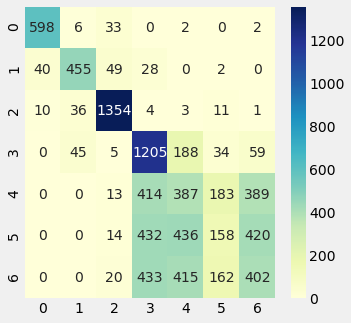

In [115]:
# visualize confusion matrix with seaborn heatmap

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

cm_matrix = pd.DataFrame(data=cm)
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')